# Credit Card Default Risk Prediction-UCI Dataset

## 1.Importing Data

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data from csv and set header=None
data=pd.read_csv(r'D:\Credit Card Prediction\cc_approvals.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


<p>The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>

In [3]:
data.columns=['Gender', 'Age', 'Debt','Married', 'BankCustomer', 
'EducationLevel', 'Ethnicity', 'YearsEmployed', 
'PriorDefault', 'Employed', 'CreditScore', 
'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EA7B34F28>,
      dtype=object)

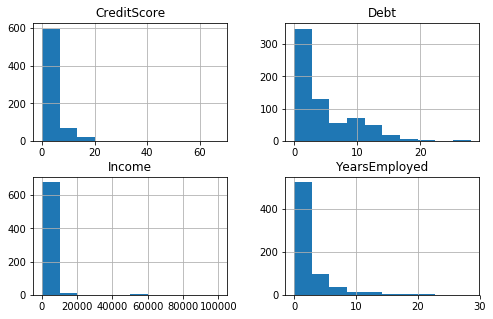

In [4]:
#view numeric figure distributions
data.hist(figsize=(8,5))

## 2.Find Missing Values

In [5]:
#view info for missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


- Usually some missing values are imputed by ? or 0
- Check out all of the data and find some '?'

In [6]:
#replace '?' by NaN
data=data.replace('?',np.NaN)

In [7]:
# Revisit data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               678 non-null object
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [8]:
#Double check for true missing values
data.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

- 0,1,3,4,5,6,13 column has missing values

## 3.Handling Missing Values

### 3.1Gender

In [9]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [10]:
data[data['Gender'].isnull()]

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,01160,0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,00372,122,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,00260,1004,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,00300,0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0,f,s,00080,0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,00263,0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,00160,234,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0,t,g,00150,1,-


In [11]:
# Filling Gender with mode
data['Gender']=data['Gender'].fillna(data['Gender'].value_counts().index[0])

### 3.2Age

In [12]:
data[data['Age'].isnull()]

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,+


In [13]:
#Transform ages to numeric values
ages=[]
for i in data['Age']:
    ages.append(float(i))
data['Age']=ages

In [14]:
data.groupby('Married')['Age'].median()

Married
l    17.79
u    28.92
y    26.75
Name: Age, dtype: float64

In [15]:
# Filling age with the median age of Married column
data['Age']=data['Age'].fillna(0)
Ages=[]
for i,k in zip(data['Age'],data['Married']):
    if i==0 and k=='l':
        Ages.append(17.79)
    elif i==0 and k=='u':
        Ages.append(28.92)
    elif i==0 and k=='y':
        Ages.append(26.75)
    else:
        Ages.append(i)
data['Age']=Ages
print(len(Ages))
print(data['Age'].isnull().sum())

690
0


### 3.3Married, BankCustomer, EducationLevel, Ethnicity, ZipCode

In [16]:
#filling the four categorical features with mode
data['Married']=data['Married'].fillna(data['Married'].value_counts()[0])
data['BankCustomer']=data['BankCustomer'].fillna(data['BankCustomer'].value_counts()[0])
data['EducationLevel']=data['EducationLevel'].fillna(data['EducationLevel'].value_counts()[0])
data['Ethnicity']=data['Ethnicity'].fillna(data['Ethnicity'].value_counts()[0])
data['ZipCode']=data['ZipCode'].fillna(data['ZipCode'].value_counts()[0])

In [17]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 4.LabelEncoding and Preprocessing

In [18]:
features=data.drop(columns=['ApprovalStatus','ZipCode','Citizen','DriversLicense'])
targets=data['ApprovalStatus'].replace({'+':1,'-':0})
features.head(3)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Income
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,0
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,560
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,824


In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 12 columns):
Gender            690 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
Income            690 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 64.8+ KB


In [20]:
#create dummy variables
features=pd.get_dummies(features,drop_first=True)
features.head(3)

,Age,Debt,YearsEmployed,CreditScore,Income,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,...,Ethnicity_dd,Ethnicity_ff,Ethnicity_h,Ethnicity_j,Ethnicity_n,Ethnicity_o,Ethnicity_v,Ethnicity_z,PriorDefault_t,Employed_t
0,30.83,0.00,1.25,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,1
1,58.67,4.46,3.04,6,560,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
2,24.50,0.50,1.50,0,824,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [24]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
features=scaler.fit_transform(features)

## 5.Building Model

In [25]:
samples=features
targets=targets.values

In [26]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(samples,targets,random_state=1,stratify=targets,test_size=0.3)

### LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### DecisionTree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 6.Model Evaluation

In [37]:
from sklearn.model_selection import cross_val_score
print('LogsticRegression CV score:',cross_val_score(lg,samples,targets,cv=5,scoring='roc_auc').mean())
print('KNN CV score:',cross_val_score(knn,samples,targets,cv=5,scoring='roc_auc').mean())
print('DecisionTree CV score:',cross_val_score(dt,samples,targets,cv=5,scoring='roc_auc').mean())
print('RandomForest CV score:',cross_val_score(rf,samples,targets,cv=5,scoring='roc_auc').mean())

LogsticRegression CV score: 0.9143306622404287
KNN CV score: 0.8784132432181362
DecisionTree CV score: 0.784759778755576
RandomForest CV score: 0.8843994179718804


## 7.Saving Model

In [38]:
from sklearn.externals import joblib
joblib.dump(lg, 'lg_model.pkl')
#lg=joblib.load('lg_model.pkl')___reload the model

['lg_model.pkl']